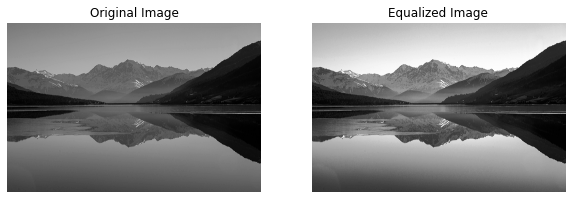

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    """Apply Histogram Equalization to enhance the image."""
    # Step 2: Compute Histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # Step 3: Compute the Cumulative Distribution Function (CDF)
    cdf = hist.cumsum()  # Cumulative sum of the histogram
    cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Normalize CDF

    # Step 4: Equalization Mapping (Normalize the CDF and map it to the range 0-255)
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros in CDF
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Scale to 0-255
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Replace masked values with 0 and convert to uint8

    # Step 5: Apply Mapping
    img_equalized = cdf[img]  # Map the original image pixels to the new values using the CDF
    
    return img_equalized

def main():
    # Step 1: Read the Image
    img = cv2.imread('C:/Users/Student/Documents/Img processing/image.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    if img is None:
        print("Error: Image not found!")
        return

    # Apply Histogram Equalization
    img_equalized = histogram_equalization(img)

    # Step 6: Display Results
    # Plot original and equalized images side by side
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Equalized Image
    plt.subplot(1, 2, 2)
    plt.imshow(img_equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    
    plt.show()

# Run the program
if __name__ == "__main__":
    main()
